# KABOSU v0.2


## What is Kabosu v0.2 and how is it different from Kabosu v0.1?
Kabosu v0.2 extends Kabosu v0.1 by applying the same exploratory data analysis (EDA) framework to a second, independent diabetes dataset (BRFSS).

While v0.1 focused on understanding a single dataset in isolation, v0.2 introduces cross-dataset comparison. The purpose is not integration or modeling, but to observe how data structure, feature behavior, and apparent signals vary across sources.

Kabosu v0.2 remains strictly exploratory.

## What is the purpose of continuing EDA on different diabetes datasets?
Patterns observed in a single dataset may reflect dataset-specific design choices rather than stable or generalizable signals.

By performing EDA across multiple diabetes datasets, Kabosu v0.2 aims to:
- assess consistency of feature distributions across sources
- identify dataset-specific artifacts and biases
- examine differences in variable definitions and encodings
- evaluate the extent of distributional shift between datasets

Replication and comparison, not novelty, are the primary goals.

## What is the problem we aim to solve with Kabosu?
Kabosu addresses a foundational problem in applied machine learning: the assumption that tabular signals are stable across datasets.

Before any modeling or integration is justified, it is necessary to understand whether features related to diabetes behave consistently across independent data sources. Kabosu treats data reliability and interpretability as the core problem to be solved.

## How are we approaching the problem?
Kabosu follows a staged, evidence-driven approach:
- apply the same EDA protocol independently to each dataset
- avoid early harmonization or forced alignment of features
- document similarities, differences, and contradictions explicitly
- defer integration and modeling until stability can be demonstrated

Complexity is introduced only when simpler analyses are insufficient.

## Yellow dog = Big Smile
A reminder that careful, methodical work can coexist with curiosity and enjoyment.


 

![Kabosu](http://metro.co.uk/wp-content/uploads/2024/05/SEI_205867985-a550.jpg?quality=90&strip=all&w=646)


# Download Data from Kaggle

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/diabetes-health-dataset-analysis")

print("Path to dataset files:", path)

Path to dataset files: /home/jijo/.cache/kagglehub/datasets/rabieelkharoua/diabetes-health-dataset-analysis/versions/1


# Load Data

In [ ]:
import pandas as pd   

df = pd.read_csv("Kabosu/data/diabetes_data.csv")

In [9]:
df.shape 

(1879, 46)

In [10]:
df.isna().sum()

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryDiabetes            0
GestationalDiabetes              0
PolycysticOvarySyndrome          0
PreviousPreDiabetes              0
Hypertension                     0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
CholesterolTotal                 0
CholesterolLDL                   0
CholesterolHDL                   0
CholesterolTriglycerides         0
AntihypertensiveMedications      0
Statins             

In [11]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1879 non-null   int64  
 1   Age                            1879 non-null   int64  
 2   Gender                         1879 non-null   int64  
 3   Ethnicity                      1879 non-null   int64  
 4   SocioeconomicStatus            1879 non-null   int64  
 5   EducationLevel                 1879 non-null   int64  
 6   BMI                            1879 non-null   float64
 7   Smoking                        1879 non-null   int64  
 8   AlcoholConsumption             1879 non-null   float64
 9   PhysicalActivity               1879 non-null   float64
 10  DietQuality                    1879 non-null   float64
 11  SleepQuality                   1879 non-null   float64
 12  FamilyHistoryDiabetes          1879 non-null   i

# Defining Categorical, Numerical, Binary and  Target Columns

In [13]:
TARGET = "Diagnosis"


num_cols = [
    "Age",
    "BMI",
    "AlcoholConsumption",
    "PhysicalActivity",
    "DietQuality",
    "SleepQuality",
    "SystolicBP",
    "DiastolicBP",
    "FastingBloodSugar",
    "HbA1c",
    "SerumCreatinine",
    "BUNLevels",
    "CholesterolTotal",
    "CholesterolLDL",
    "CholesterolHDL",
    "CholesterolTriglycerides",
    "FatigueLevels",
    "QualityOfLifeScore",
    "MedicalCheckupsFrequency",
    "MedicationAdherence",
    "HealthLiteracy"
]


binary_cols = [
    "Gender",  
    "Smoking",
    "FamilyHistoryDiabetes",
    "GestationalDiabetes",
    "PolycysticOvarySyndrome",
    "PreviousPreDiabetes",
    "Hypertension",
    "AntihypertensiveMedications",
    "Statins",
    "AntidiabeticMedications",
    "FrequentUrination",
    "ExcessiveThirst",
    "UnexplainedWeightLoss",
    "BlurredVision",
    "SlowHealingSores",
    "TinglingHandsFeet",
    "HeavyMetalsExposure",
    "OccupationalExposureChemicals",
    "WaterQuality"
]


cat_cols = [
    "Ethnicity",
    "SocioeconomicStatus",
    "EducationLevel"
]


id_cols = ["PatientID"]


# Data Analysis

In [15]:
import matplotlib.pyplot as plt  
import seaborn as sns


## Target Distribution

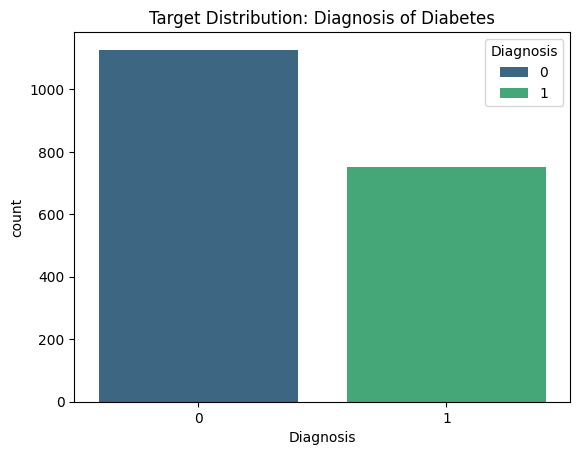

In [16]:
sns.countplot(
    data = df,
    x=TARGET,
    palette="viridis",
    hue=TARGET,
)
plt.title("Target Distribution: Diagnosis of Diabetes")
plt.show()

## Categorical Features vs Target

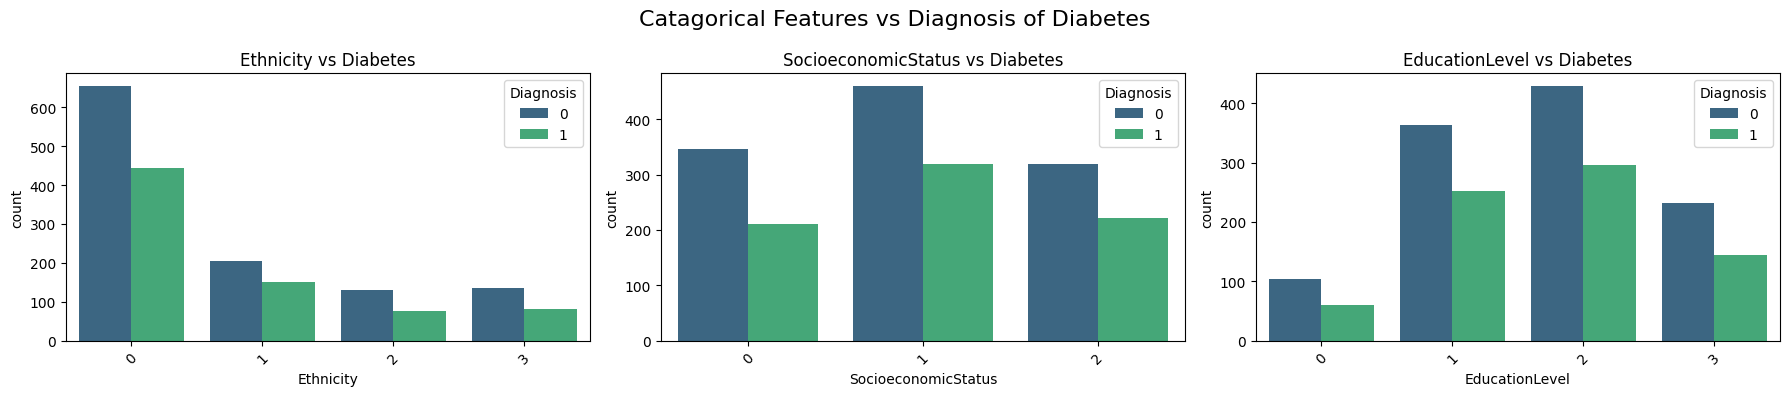

In [17]:
import math

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(6 * n_cols, 4 * n_rows),
    squeeze=False
)

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(
        data=df,
        x=col,
        hue=TARGET,
        palette="viridis",
        ax=ax
    )
    ax.set_title(f"{col} vs Diabetes")
    ax.tick_params(axis="x", rotation=45)


for ax in axes.flatten()[len(cat_cols):]:
    ax.remove()


fig.suptitle("Catagorical Features vs Diagnosis of Diabetes", fontsize=16)
plt.tight_layout()
plt.show()

## Binary Features vs Target

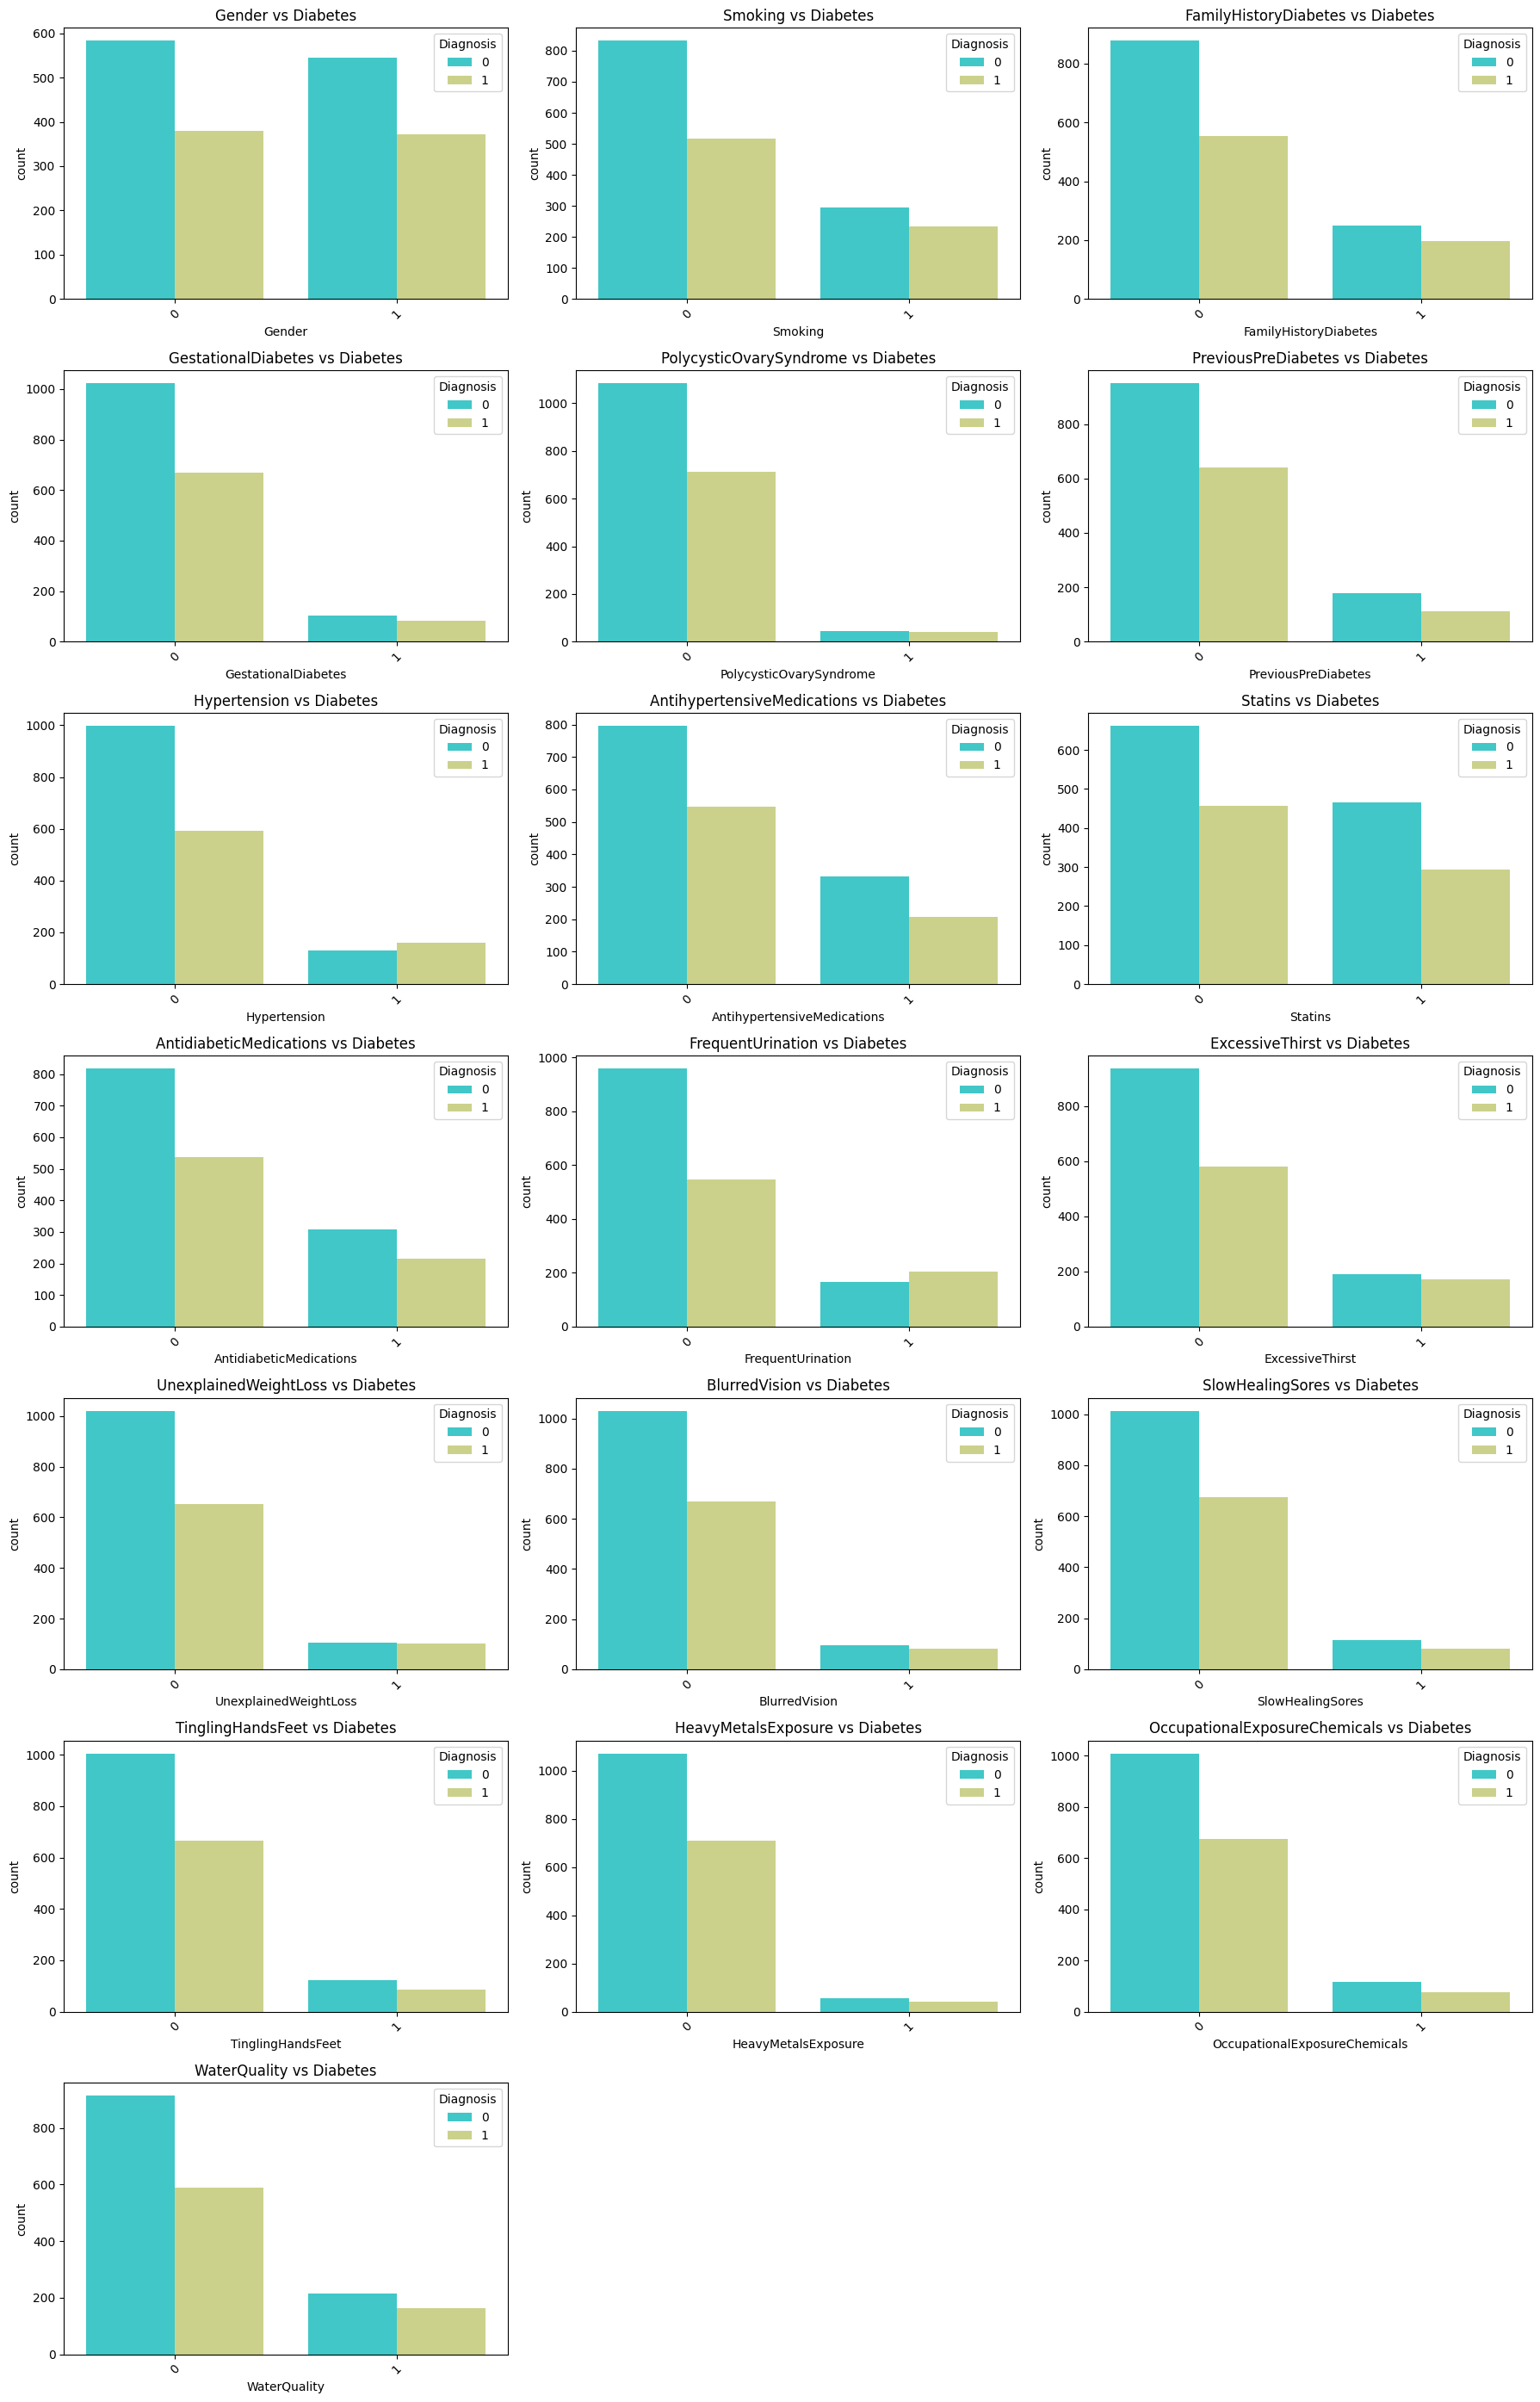

In [19]:
n_cols = 3
n_rows = math.ceil(len(binary_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(6 * n_cols, 4 * n_rows),
    squeeze=False
)

for ax, col in zip(axes.flatten(), binary_cols):
    sns.countplot(
        data=df,
        x=col,
        hue=TARGET,
        palette="rainbow",
        ax=ax
    )
    ax.set_title(f"{col} vs Diabetes")
    ax.tick_params(axis="x", rotation=45)


for ax in axes.flatten()[len(binary_cols):]:
    ax.remove()


plt.tight_layout()
plt.show()

## Numerical Features vs Target

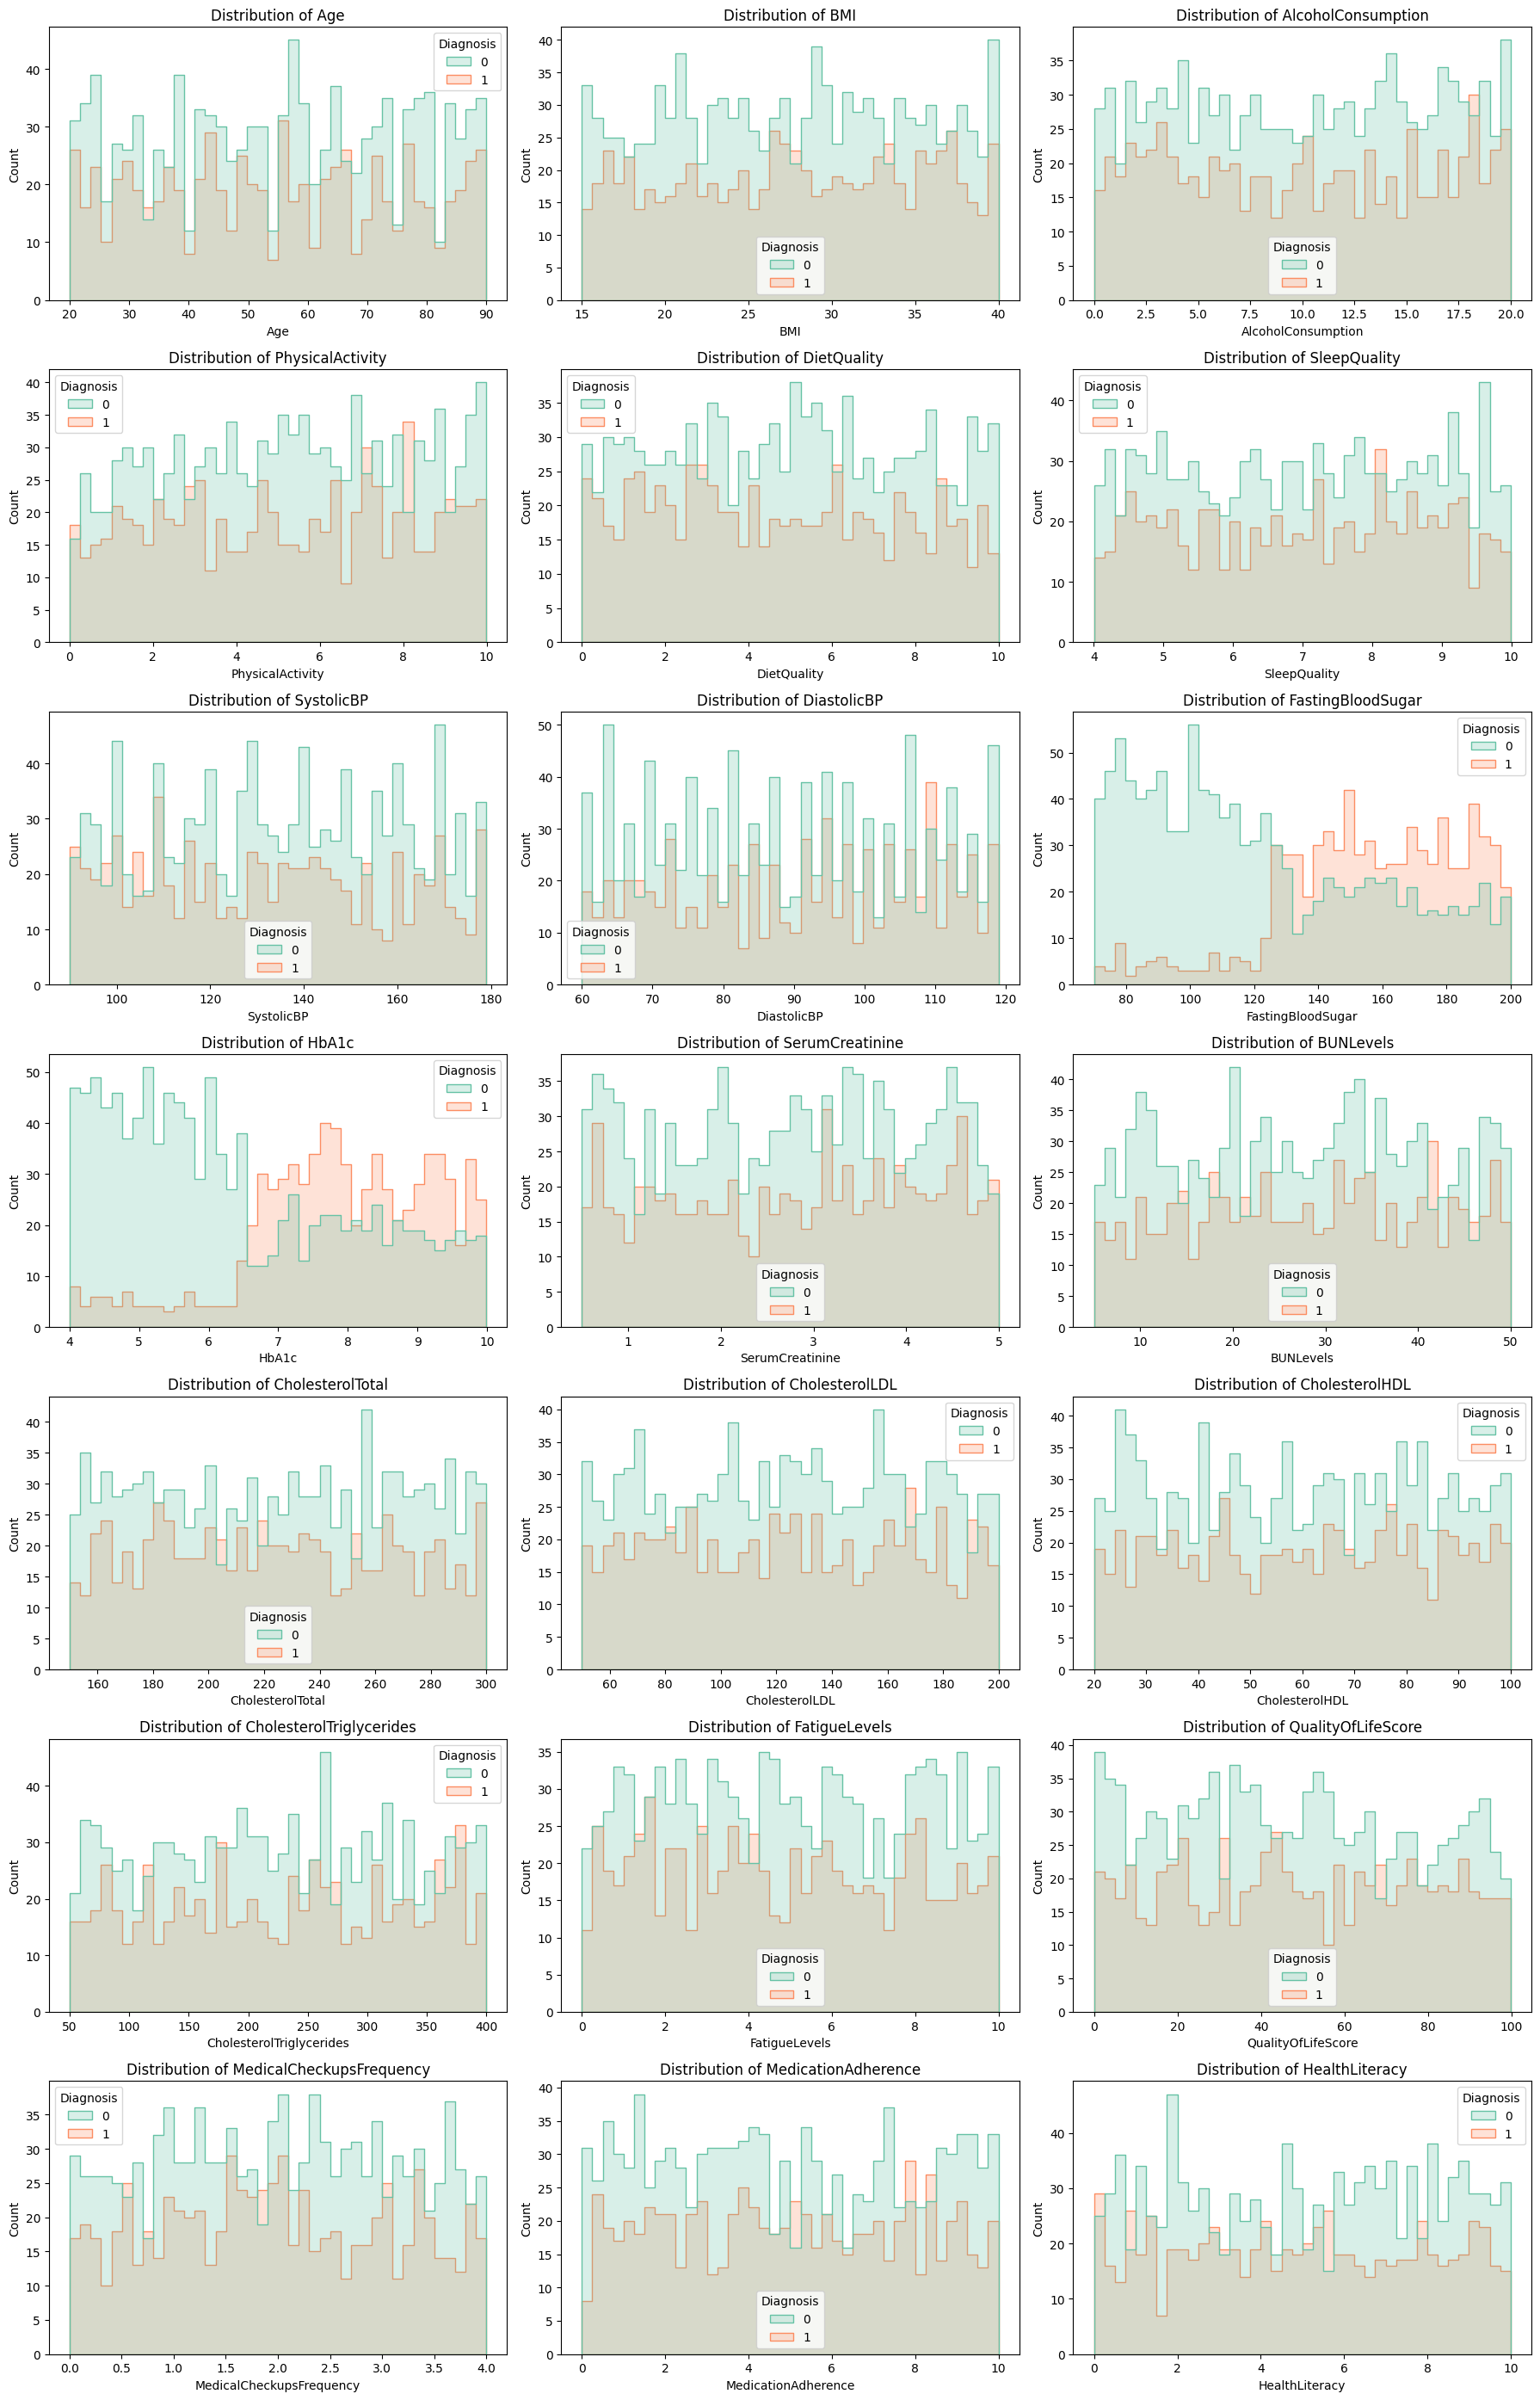

In [20]:
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(6 * n_cols, 4 * n_rows),
    squeeze=False
)

for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(
        data=df,
        x=col,
        hue=TARGET,
        bins=40,
        element="step",
        stat="count",
        common_norm=False,
        palette="Set2",
        ax=ax
    )
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)

# Remove empty subplots
for ax in axes.flatten()[len(num_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

## Correlation Heatmap

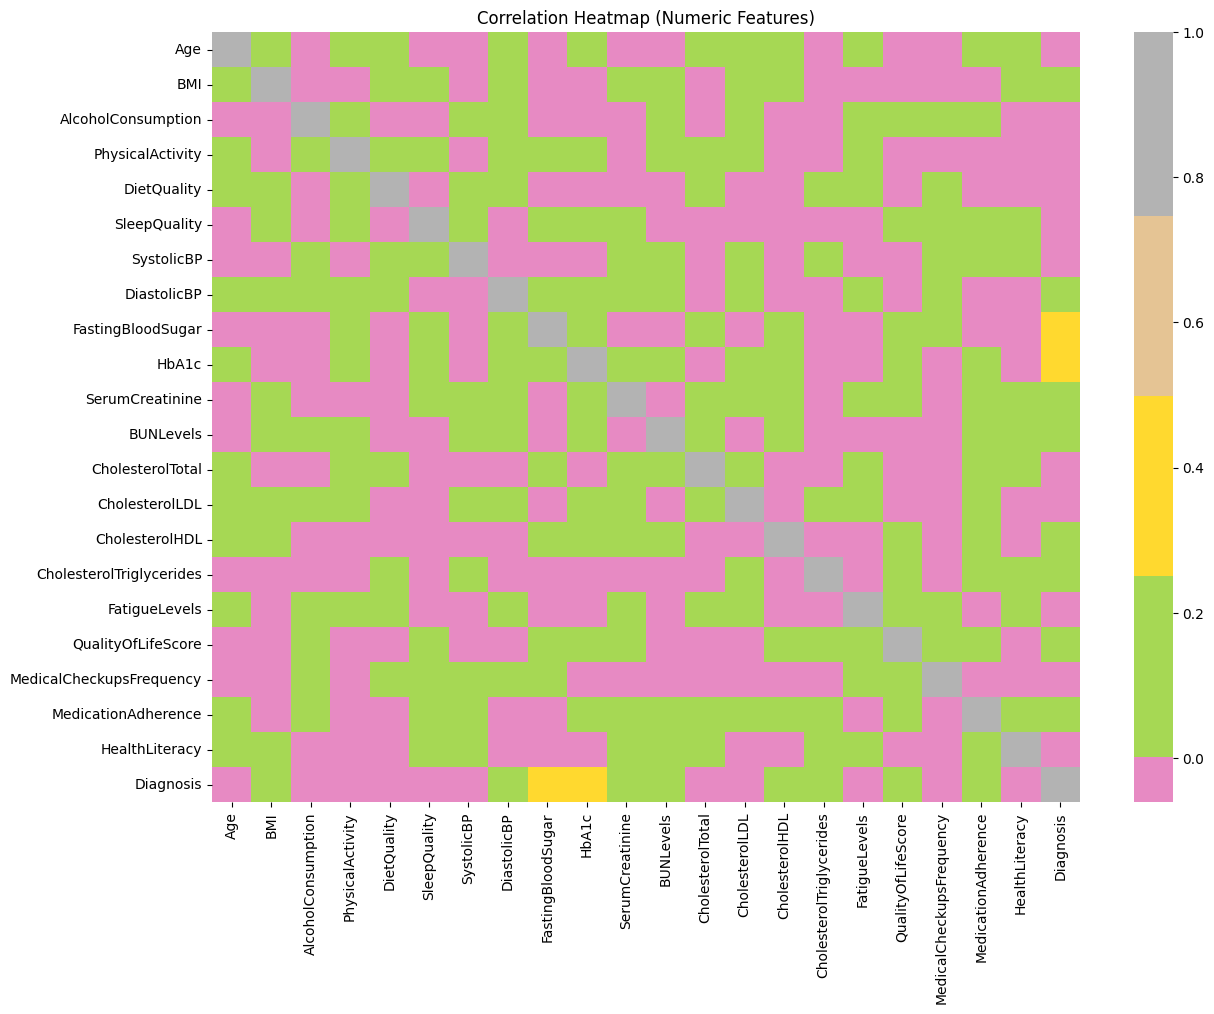

In [21]:
plt.figure(figsize=(14,10))
sns.heatmap(
    df[num_cols + [TARGET]].corr(),
    cmap="Set2",
    center=0
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

## Dataset Used in Kabosu v0.2

Kabosu v0.2 uses a second, independent diabetes dataset consisting of health records for **1,879 patients**, with anonymized patient IDs ranging from 6000 to 7878.

The dataset is **synthetic**, generated for educational and analytical purposes, and is released under a **CC BY 4.0 license**. It is treated as an external data source for comparative exploratory analysis rather than as a clinically validated cohort.

## Dataset Structure and Scope

The dataset contains a broad range of variables spanning multiple domains:

### Demographic and Socioeconomic Information
- Age (20–90)
- Gender (binary encoded)
- Ethnicity (categorical)
- Socioeconomic status
- Education level

### Lifestyle and Behavioral Factors
- BMI
- Smoking status
- Alcohol consumption
- Physical activity
- Diet quality
- Sleep quality
- Medical check-up frequency
- Medication adherence
- Health literacy

### Medical History
- Family history of diabetes
- Gestational diabetes
- Polycystic ovary syndrome
- Prior pre-diabetes
- Hypertension

### Clinical Measurements
- Blood pressure (systolic and diastolic)
- Fasting blood glucose
- HbA1c
- Renal function markers (serum creatinine, BUN)
- Lipid profile (total cholesterol, LDL, HDL, triglycerides)

### Medications
- Antihypertensive medications
- Statins
- Antidiabetic medications

### Symptoms and Quality of Life
- Classic diabetes-related symptoms (e.g., frequent urination, excessive thirst)
- Fatigue levels
- Quality of life score

### Environmental and Occupational Exposures
- Heavy metal exposure
- Occupational chemical exposure
- Water quality

### Target Variable
- **Diagnosis**: binary indicator of diabetes status

## Relevance to Kabosu v0.2

This dataset differs substantially from the dataset used in Kabosu v0.1 in:
- feature breadth and granularity
- variable naming and encoding
- inclusion of symptoms, medications, and environmental exposures
- sample size and distributional properties

Kabosu v0.2 does **not** attempt to merge or harmonize this dataset with v0.1. Instead, the dataset is analyzed independently using the same EDA framework to assess:
- structural differences between datasets
- stability of observed patterns
- presence of synthetic artifacts
- consistency of feature–target relationships

## Important Caveat

Because this dataset is synthetic, all observed patterns are interpreted cautiously. Apparent signal strength, separability, or correlations may reflect design assumptions rather than real-world epidemiology.

This limitation is explicitly acknowledged and treated as part of the analysis rather than a defect to be hidden.


# CITATION

Dataset used for this notebook: https://doi.org/10.34740/kaggle/dsv/8665939